# Assignment:Different MLP architectures on MNIST dataset

In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [3]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> MLP + Batch-Norm on 2-hidden Layers + Dropout + AdamOptimizer </h2>

In [13]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_drop = Sequential()

model_drop.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 450)               353250    
_________________________________________________________________
batch_normalization_1 (Batch (None, 450)               1800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 450)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 108)               48708     
_________________________________________________________________
batch_normalization_2 (Batch (None, 108)               432       
_________________________________________________________________
dropout_2 (Dropout)  

In [14]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.4977 - acc: 0.8478 - val_loss: 0.1694 - val_acc: 0.9491
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2647 - acc: 0.9215 - val_loss: 0.1280 - val_acc: 0.9596
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2112 - acc: 0.9364 - val_loss: 0.1092 - val_acc: 0.9657
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1842 - acc: 0.9456 - val_loss: 0.0983 - val_acc: 0.9684
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1635 - acc: 0.9507 - val_loss: 0.0898 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1500 - acc: 0.9548 - val_loss: 0.0841 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - 

Test score: 0.06346649114196189
Test accuracy: 0.982


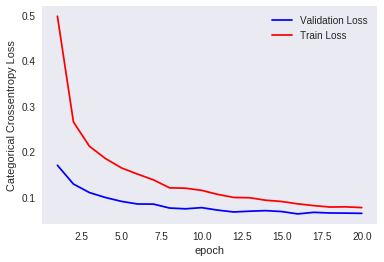

In [15]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP of 2-hidden Layers  + AdamOptimizer </h2>

In [16]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_nodrop = Sequential()

model_nodrop.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))


model_nodrop.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_nodrop.add(Dense(output_dim, activation='softmax'))


model_nodrop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 450)               353250    
_________________________________________________________________
dense_5 (Dense)              (None, 108)               48708     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1090      
Total params: 403,048
Trainable params: 403,048
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_nodrop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_nodrop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2350 - acc: 0.9309 - val_loss: 0.1158 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0932 - acc: 0.9707 - val_loss: 0.0999 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0609 - acc: 0.9810 - val_loss: 0.0953 - val_acc: 0.9705
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0452 - acc: 0.9851 - val_loss: 0.0826 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0337 - acc: 0.9890 - val_loss: 0.0919 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0940 - val_acc: 0.9736
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0887 - 

Test score: 0.10742944338343391
Test accuracy: 0.9813


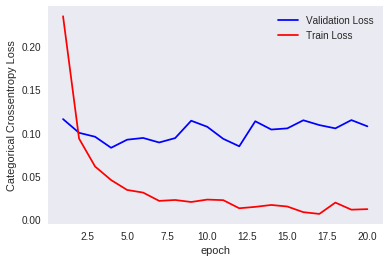

In [18]:
score = model_nodrop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on 3-hidden Layers + Dropout + AdamOptimizer </h2>

In [19]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_drop_3 = Sequential()

model_drop_3.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop_3.add(BatchNormalization())
model_drop_3.add(Dropout(0.5))

model_drop_3.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_3.add(BatchNormalization())
model_drop_3.add(Dropout(0.5))

model_drop_3.add(Dense(45, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_3.add(BatchNormalization())
model_drop_3.add(Dropout(0.5))

model_drop_3.add(Dense(output_dim, activation='softmax'))


model_drop_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 420)               329700    
_________________________________________________________________
batch_normalization_3 (Batch (None, 420)               1680      
_________________________________________________________________
dropout_3 (Dropout)          (None, 420)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               63150     
_________________________________________________________________
batch_normalization_4 (Batch (None, 150)               600       
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 45)                6795      
__________

In [20]:
model_drop_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.9746 - acc: 0.6962 - val_loss: 0.2475 - val_acc: 0.9293
Epoch 2/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.4498 - acc: 0.8710 - val_loss: 0.1842 - val_acc: 0.9434
Epoch 3/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.3415 - acc: 0.9035 - val_loss: 0.1503 - val_acc: 0.9553
Epoch 4/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2841 - acc: 0.9212 - val_loss: 0.1271 - val_acc: 0.9616
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2508 - acc: 0.9315 - val_loss: 0.1198 - val_acc: 0.9655
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2258 - acc: 0.9381 - val_loss: 0.1126 - val_acc: 0.9666
Epoch 7/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2104 - acc: 0.9422 - val_loss: 0.1039 -

Test score: 0.07306666850231704
Test accuracy: 0.9804


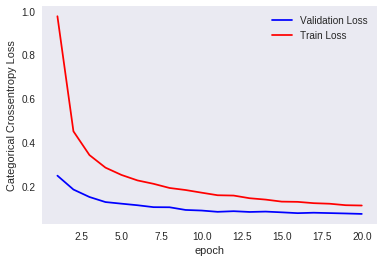

In [21]:
score = model_drop_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP of 3-hidden Layers  + AdamOptimizer </h2>

In [22]:

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_nodrop_3 = Sequential()

model_nodrop_3.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))


model_nodrop_3.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )


model_nodrop_3.add(Dense(45, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_nodrop_3.add(Dense(output_dim, activation='softmax'))


model_nodrop_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 420)               329700    
_________________________________________________________________
dense_12 (Dense)             (None, 150)               63150     
_________________________________________________________________
dense_13 (Dense)             (None, 45)                6795      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                460       
Total params: 400,105
Trainable params: 400,105
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_nodrop_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_nodrop_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.5601 - acc: 0.8919 - val_loss: 0.1871 - val_acc: 0.9442
Epoch 2/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1447 - acc: 0.9577 - val_loss: 0.1656 - val_acc: 0.9536
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0938 - acc: 0.9720 - val_loss: 0.1405 - val_acc: 0.9616
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0683 - acc: 0.9784 - val_loss: 0.1246 - val_acc: 0.9677
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0602 - acc: 0.9813 - val_loss: 0.1289 - val_acc: 0.9667
Epoch 6/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0527 - acc: 0.9840 - val_loss: 0.1148 - val_acc: 0.9683
Epoch 7/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0436 - acc: 0.9860 - val_loss: 0.1235 - 

Test score: 0.12885217315385394
Test accuracy: 0.9777


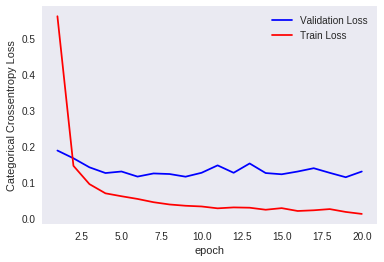

In [24]:
score = model_nodrop_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on 5-hidden Layers + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_drop_5 = Sequential()

model_drop_5.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(output_dim, activation='softmax'))




In [26]:
model_drop_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               120300    
__________

In [27]:
model_drop_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 292us/step - loss: 1.8485 - acc: 0.3933 - val_loss: 0.5944 - val_acc: 0.8594
Epoch 2/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.8077 - acc: 0.7382 - val_loss: 0.2827 - val_acc: 0.9199
Epoch 3/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.5267 - acc: 0.8455 - val_loss: 0.2153 - val_acc: 0.9390
Epoch 4/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.4207 - acc: 0.8816 - val_loss: 0.1858 - val_acc: 0.9482
Epoch 5/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.3443 - acc: 0.9062 - val_loss: 0.1620 - val_acc: 0.9545
Epoch 6/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.2981 - acc: 0.9207 - val_loss: 0.1413 - val_acc: 0.9623
Epoch 7/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.2687 - acc: 0.9288 - val_loss: 0.

Test score: 0.08643636736939661
Test accuracy: 0.9793


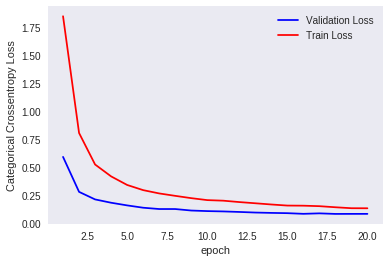

In [28]:
score = model_drop_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP of 5-hidden Layers + AdamOptimizer </h2>

In [29]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_nodrop_5 = Sequential()

model_nodrop_5.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_nodrop_5.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_nodrop_5.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_nodrop_5.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )


model_nodrop_5.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model_nodrop_5.add(Dense(output_dim, activation='softmax'))
model_nodrop_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_22 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_23 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_24 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_25 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
Total params: 766,410
Trainable params: 766,410
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_nodrop_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_nodrop_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 14.5270 - acc: 0.0987 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 2/20
60000/60000 [==============================] - 11s 188us/step - loss: 14.5270 - acc: 0.0987 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 14.5270 - acc: 0.0987 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 4/20
60000/60000 [==============================] - 11s 191us/step - loss: 14.5270 - acc: 0.0987 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 5/20
60000/60000 [==============================] - 11s 189us/step - loss: 14.5270 - acc: 0.0987 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 6/20
60000/60000 [==============================] - 11s 191us/step - loss: 14.5270 - acc: 0.0987 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 7/20
60000/60000 [==============================] - 11s 189us/step - loss: 14.5270 - acc: 0.0987 -

Test score: 14.538521841430665
Test accuracy: 0.098


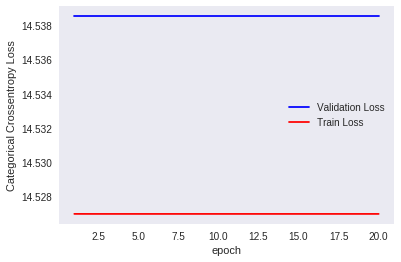

In [31]:
score = model_nodrop_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

__MLP with Batch Normalization and Dropout__

In [11]:
import pandas as pd
models = pd.DataFrame({'Hidden layers': ['2', '3', "5"], 'Test score' : [0.06,0.07,0.08],'Accuracy': [0.9820,0.9804,0.9793]}, columns = ["Hidden layers","Test score","Accuracy"])
models

,Hidden layers,Test score,Accuracy
0,2,0.06,0.9820
1,3,0.07,0.9804
2,5,0.08,0.9793


__MLP without Batch Normalization and Dropout__

In [12]:
models = pd.DataFrame({'Hidden layers': ['2', '3', "5"], 'Test score' : [0.10,0.12,14.33],'Accuracy': [0.9813,0.9777,0.098]}, columns = ["Hidden layers","Test score","Accuracy"])
models

,Hidden layers,Test score,Accuracy
0,2,0.10,0.9813
1,3,0.12,0.9777
2,5,14.33,0.0980
